In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd
retail_df = pd.read_excel(r"C:\Users\blake\Documents\New folder\Resources\Online Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<Axes: xlabel='count', ylabel='Country'>

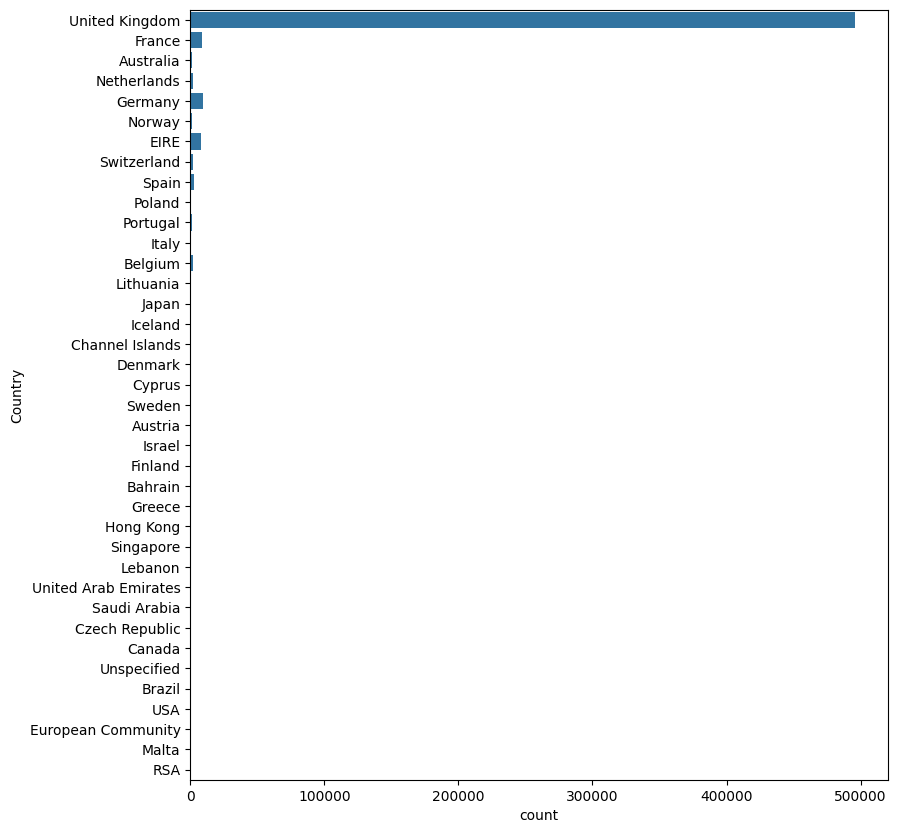

In [4]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='Country', data=retail_df)

In [5]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail_df.isnull().sum())/len(retail_df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
# Droping rows having missing values

retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [7]:
# Drop rows with "POST" in the StockCode column
retail_df = retail_df[retail_df['StockCode'] != 'POST']

# Drop rows where InvoiceNo column starts with "C"
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.startswith('C')]

In [8]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [9]:
from datetime import date
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)

# Convert 'InvoiceDate' column to datetime data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Verify the data types of the DataFrame
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396825 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396825 non-null  object        
 1   StockCode    396825 non-null  object        
 2   Description  396825 non-null  object        
 3   Quantity     396825 non-null  int64         
 4   InvoiceDate  396825 non-null  datetime64[ns]
 5   UnitPrice    396825 non-null  float64       
 6   CustomerID   396825 non-null  object        
 7   Country      396825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [10]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

<Axes: xlabel='Frequency', ylabel='Description'>

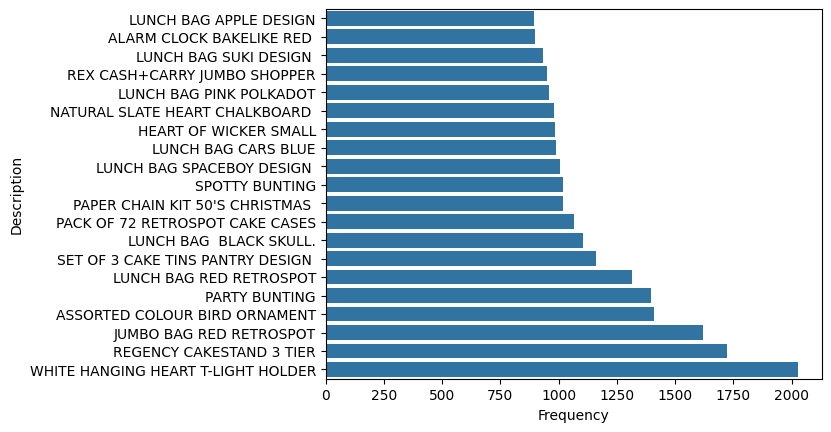

In [11]:
# Get the top 25 most frequent descriptions
top_20_descriptions = retail_df['Description'].value_counts().index[:20]

# Filter the DataFrame to include only rows with descriptions in the top 25
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Sort the DataFrame by description frequency in ascending order
top_20_df = top_20_df.groupby('Description').size().reset_index(name='Frequency')
top_20_df = top_20_df.sort_values(by='Frequency')

# Bar plot of the top 25 most frequent descriptions in ascending order
sns.barplot(y='Description', x='Frequency', data=top_20_df)

In [12]:
# Get the top 20 most frequent descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with descriptions in the top 20
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Count occurrences of each description
description_counts = top_20_df['Description'].value_counts()

# Create DataFrame with frequencies
top_20_df = description_counts.reset_index()
top_20_df.columns = ['Description', 'Frequency']

# Sort the DataFrame by frequency
top_20_df = top_20_df.sort_values(by='Frequency')

# Create an interactive bar plot with Plotly
fig = px.bar(top_20_df, x='Frequency', y='Description', orientation='h', title='Top 20 Most Frequent Descriptions')
fig.update_layout(xaxis_title='Frequency', yaxis_title='Description')
fig.show()

In [13]:
import plotly.express as px

# Get the top 25 most frequent item descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with the top 25 descriptions
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Extract month from InvoiceDate
top_20_df['Month'] = top_20_df['InvoiceDate'].dt.month

# Group by month and item description, then sum up 'Quantity' for each month
monthly_quantity = top_20_df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Create an interactive line plot using Plotly
fig = px.line(monthly_quantity, x='Month', y='Quantity', color='Description', title='Monthly Quantity of Top 20 Item Descriptions')
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Quantity'),
    legend_title='Description'
)
fig.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_23084\1977119150.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def define_model(input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    
    return model

# Define your features (X) and target variable (y)
X = top_20_df[['Quantity', 'InvoiceNo', 'StockCode']]
y = top_20_df['UnitPrice']
# Assuming your input shape is (num_features,)
input_shape = (X.shape[1],)
model = define_model(input_shape)

c:\Users\blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



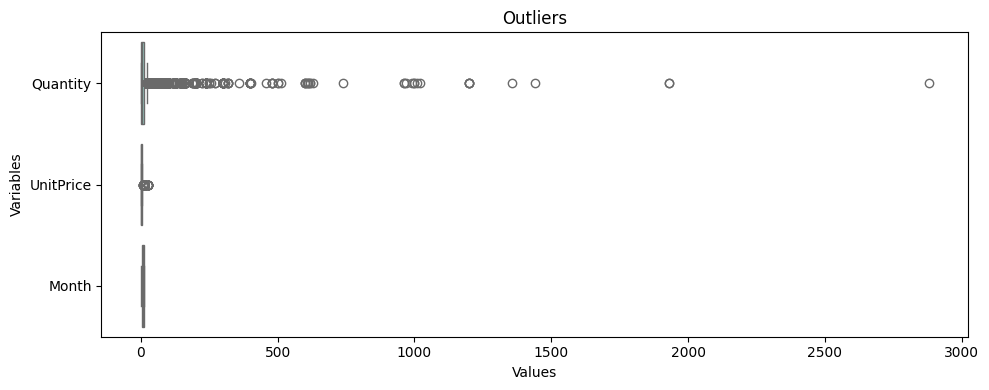

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
new_df = top_20_df.drop(columns = ['CustomerID', "InvoiceNo"])
sns.boxplot(data=new_df, orient='h', palette='Set3', native_scale= True)
plt.title('Outliers', fontsize=12)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

In [16]:
# Perform one-hot encoding for the 'StockCode' column
retail_df_encoded = pd.get_dummies(retail_df, columns=['StockCode'], prefix='StockCode')

In [17]:
# Convert 'InvoiceDate' column to datetime format if it's not already
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extract month from 'InvoiceDate' and create a new column
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].dt.month

# Display the DataFrame with the new 'InvoiceMonth' column
print(retail_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  InvoiceMonth  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom            12  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom            12  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom            12  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom            12  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom            12  


In [18]:
retail_df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID              object
Country                 object
InvoiceMonth             int32
dtype: object

In [19]:
# Assuming 'df' is your DataFrame and 'InvoiceMonth' is the column with month values
df_encoded = pd.get_dummies(retail_df, columns=['InvoiceMonth'], prefix='Month')

# This will create binary columns for each month value in 'InvoiceMonth'

In [20]:
# Drop the binary column for December (which corresponds to the value 12)
df_encoded = df_encoded.drop('Month_12', axis=1)

In [21]:
df_encoded.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11'],
      dtype='object')

In [22]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth'],
      dtype='object')

In [23]:
# Select features and target variable
X = df_encoded[['CustomerID']]  # Features: CustomerID, TotalPrice
y = df_encoded['Quantity']  # Target variable: Quantity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 12.87050399345214


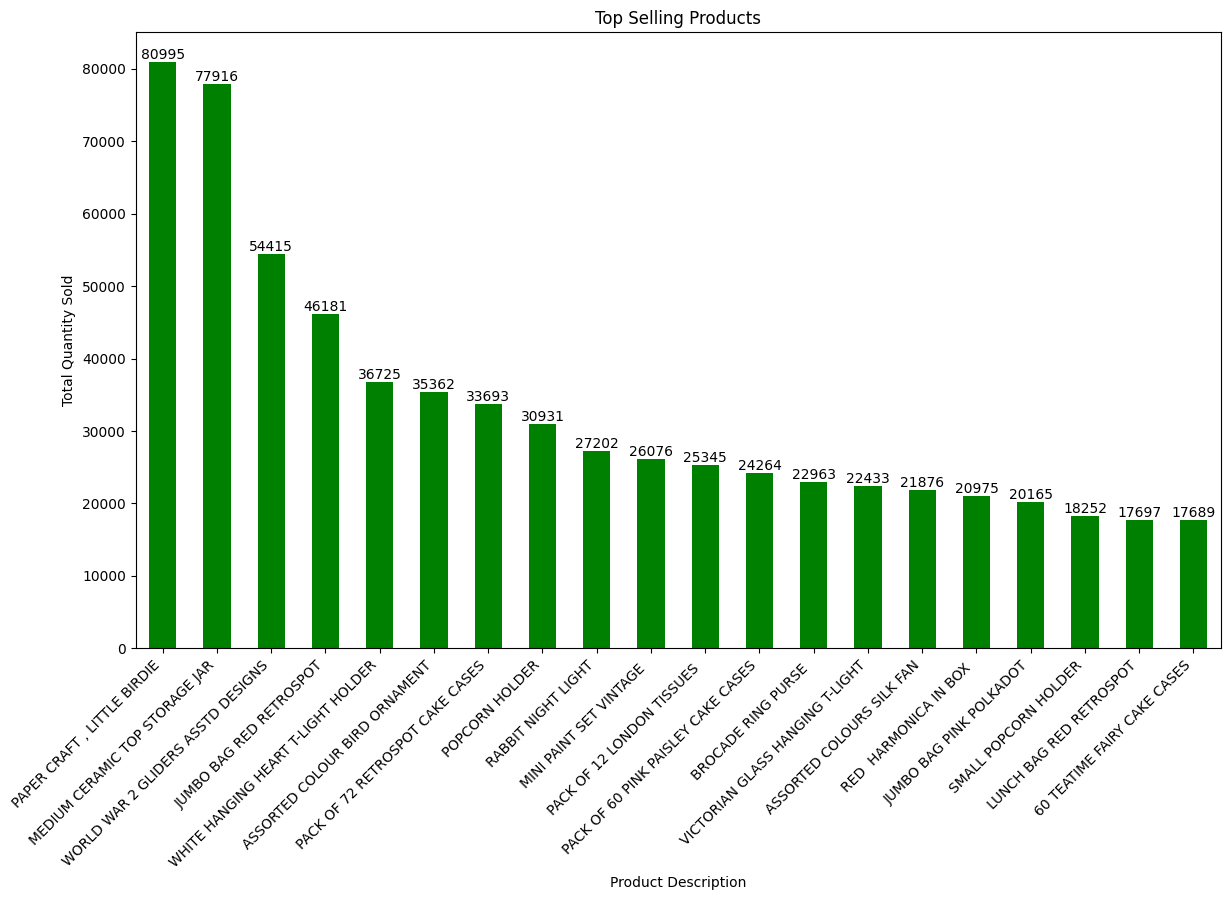

In [24]:
plt.figure(figsize=(14, 8))
top_products = retail_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
top_products.plot(kind='bar', color='green')

plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')

# Annotating data labels
for i, value in enumerate(top_products):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.show()

In [25]:
df_encoded.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Month_1                  bool
Month_2                  bool
Month_3                  bool
Month_4                  bool
Month_5                  bool
Month_6                  bool
Month_7                  bool
Month_8                  bool
Month_9                  bool
Month_10                 bool
Month_11                 bool
dtype: object

In [26]:
df_encoded.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False,False,False,False,False,False,False,False,False,False,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,False,False,False,False,False,False,False,False,False,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,False,False,False,False,False,False,False,False,False,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,False,False,False,False,False,False,False,False,False,False
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,False,False,False,False,False,False,False,False,False,False,False


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=7)  # Define the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.27984627984627986


In [29]:
df_encoded_new = pd.DataFrame(df_encoded, columns=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'InvoiceSpan', 'Month', 'StockCode_encoded'])




In [30]:
df_encoded_new2 = pd.DataFrame(df_encoded, columns=['StockCode', 'Quantity', 'UnitPrice', 'Country', 'Month'])


In [31]:
df_encoded_new2 = df_encoded_new2.astype(str)
df_encoded_new2.drop(columns=['Month'], inplace=True)
df_encoded_new2.head()

,StockCode,Quantity,UnitPrice,Country
0,85123A,6,2.55,United Kingdom
1,71053,6,3.39,United Kingdom
2,84406B,8,2.75,United Kingdom
3,84029G,6,3.39,United Kingdom
4,84029E,6,3.39,United Kingdom


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_encoded_new2['Country'] = encoder.fit_transform(df_encoded_new2['Country'])
df_encoded_new2['StockCode'] = encoder.fit_transform(df_encoded_new2['StockCode'])
df_encoded_new2.head()

,StockCode,Quantity,UnitPrice,Country
0,3233,6,2.55,35
1,2643,6,3.39,35
2,2847,8,2.75,35
3,2795,6,3.39,35
4,2794,6,3.39,35


In [33]:
# Scaling the dataset
scaler = StandardScaler()
newdata = df_encoded_new2.sample(n=5000)
X = newdata.values
X = scaler.fit_transform(X)
X

array([[ 0.24278094, -0.28083718, -0.15315225,  0.31058415],
       [ 0.73795419, -0.34103292,  0.15750426,  0.31058415],
       [-0.68432657,  3.24061334, -0.04178482,  0.31058415],
       ...,
       [-1.50046754, -0.28083718,  0.15750426,  0.31058415],
       [ 0.74511332,  0.35121804, -0.15315225,  0.31058415],
       [-1.50524029,  0.35121804, -0.18011489,  0.31058415]])

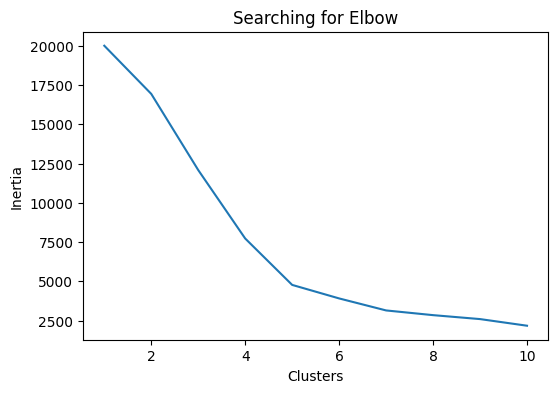

In [34]:
from sklearn.cluster import KMeans
import seaborn as sns

clusters = []

# testing from 1 to 10 cluster in order to know how many clusters are necessary for a better accuracy
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

<Axes: xlabel='Labels', ylabel='StockCode'>

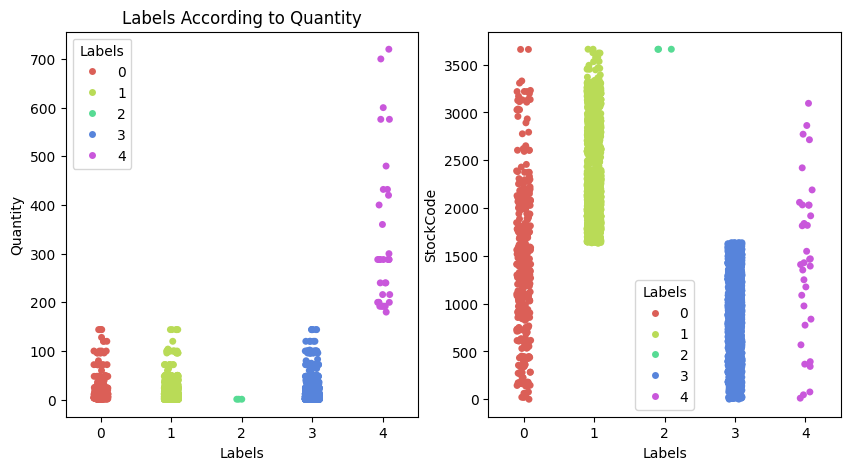

In [35]:
km5 = KMeans(n_clusters=5).fit(X)

newdata['Labels'] = km5.labels_

# Convert 'Quantity' column to numeric

newdata['Quantity'] = pd.to_numeric(newdata['Quantity'])

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
sns.stripplot(x='Labels', y='Quantity', data=newdata, ax=ax, hue=newdata['Labels'], 
              palette=sns.color_palette('hls', 5), size=5)  # Adjust size here
ax.set_title('Labels According to Quantity')
ax.set_yticks(range(0, newdata['Quantity'].max(), 100))  # Adjust the tick interval as needed

ax = fig.add_subplot(122)
sns.stripplot(x='Labels', y='StockCode', data=newdata, ax=ax, hue=newdata['Labels'], 
              palette=sns.color_palette('hls', 5), size=5)  # 


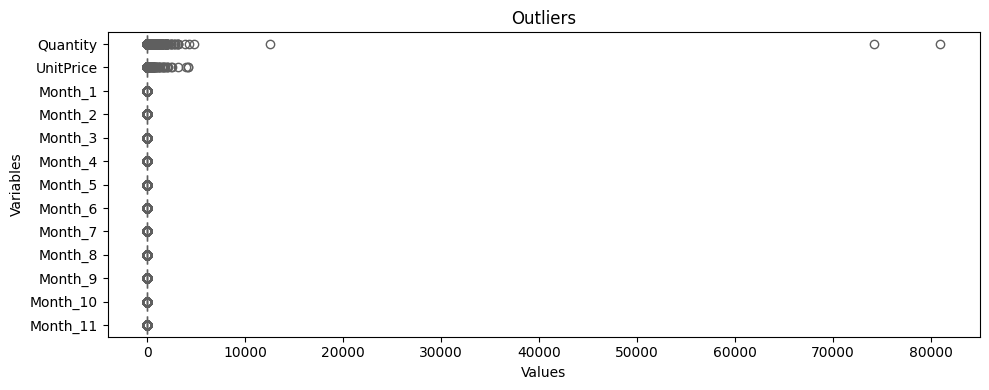

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
new_df = df_encoded.drop(columns = ['CustomerID', "InvoiceNo"])
sns.boxplot(data=new_df, orient='h', palette='Set3')
plt.title('Outliers', fontsize=12)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.3270963270963271


In [38]:
print(df_encoded.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11'],
      dtype='object')


In [39]:
df_encoded.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,False,False,False,False,False,False,False,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,False,False,False,False,False,False,False,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,False,False,False,False,False,False,False,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,False,False,False,False,False,False,False,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,False,False,False,False,False,False,False,False,False


In [40]:
# Determine the frequency of CustomerID
customer_frequency = retail_df['CustomerID'].value_counts()

# Display the frequency
print(customer_frequency)

CustomerID
17841    7847
14911    5677
14096    5111
12748    4595
14606    2699
         ... 
17923       1
15389       1
14576       1
16078       1
17102       1
Name: count, Length: 4339, dtype: int64


In [41]:
# Create a new DataFrame from the frequency Series
customer_frequency_df = pd.DataFrame(customer_frequency)
customer_frequency_df.reset_index(inplace=True)
customer_frequency_df.columns = ['CustomerID', 'CustFrequency']

# Display the new DataFrame
print(customer_frequency_df.head())

  CustomerID  CustFrequency
0      17841           7847
1      14911           5677
2      14096           5111
3      12748           4595
4      14606           2699


In [42]:
# count the number of unique invoice numbers for each customer
Invoicefrequency = retail_df.groupby('CustomerID')['InvoiceNo'].nunique()
Invoicefrequency


CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4339, dtype: int64

In [43]:

# Group by CustomerID and InvoiceNo, then count the occurrences of each combination
invoice_frequency = retail_df.groupby(['CustomerID', 'InvoiceNo']).size().reset_index(name='InvoiceFrequency')

# Display the DataFrame
print(invoice_frequency[['CustomerID', 'InvoiceNo', 'InvoiceFrequency']])

      CustomerID  InvoiceNo  InvoiceFrequency
0          12346     541431                 1
1          12347     537626                31
2          12347     542237                29
3          12347     549222                24
4          12347     556201                18
...          ...        ...               ...
18479      18283     579673                52
18480      18283     580872                50
18481      18287     554065                29
18482      18287     570715                38
18483      18287     573167                 3

[18484 rows x 3 columns]


In [44]:
Invoicefrequency_df = pd.DataFrame(Invoicefrequency)
Invoicefrequency_df.reset_index(inplace=True)
Invoicefrequency_df.columns = ['CustomerID', 'InvoiceFrequency']
Invoicefrequency_df.head()

,CustomerID,InvoiceFrequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [45]:
Invoicefrequency_df.columns

Index(['CustomerID', 'InvoiceFrequency'], dtype='object')

In [46]:
# count the number of unique invoice numbers for each customer
StockCodefreq = retail_df['CustomerID'].value_counts()


In [47]:
StockCodefreq_df = pd.DataFrame(StockCodefreq)
StockCodefreq_df.reset_index(inplace=True)
StockCodefreq_df.columns = ['CustomerID', 'StockCodeFreq']
StockCodefreq_df.head()

,CustomerID,StockCodeFreq
0,17841,7847
1,14911,5677
2,14096,5111
3,12748,4595
4,14606,2699


In [48]:
#add new column Total Price
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34


In [49]:
RFM_df = pd.read_csv(r"C:\Users\blake\Documents\New folder\Resources\RFM.csv")
RFM_df.head()

,CustomerID,Frequency,MonetaryValue,UnitPrice,Quantity,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,12346,1,77183.60,1.040000,74215.000000,325,1,1,2,4,Low-Value,At Risk
1,12347,182,4310.00,2.644011,13.505495,366,1,1,1,3,Low-Value,Gone
2,12348,27,1437.24,0.692963,86.370370,357,1,1,1,3,Low-Value,Gone
3,12349,72,1457.55,4.237500,8.750000,18,5,1,1,7,High-Value,Loyal Customers
4,12350,16,294.40,1.581250,12.250000,309,1,1,1,3,Low-Value,Gone


In [50]:
RFM_df['CustomerID'] = RFM_df['CustomerID'].astype(str)

In [51]:
RFM_merged_df = pd.merge(retail_df, RFM_df, on=['CustomerID'], how='inner')
RFM_merged_df.head()

,InvoiceNo,StockCode,Description,Quantity_x,InvoiceDate,UnitPrice_x,CustomerID,Country,InvoiceMonth,TotalPrice,...,MonetaryValue,UnitPrice_y,Quantity_y,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,15.30,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,22.00,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone


In [52]:
RFM_merged_df.shape

(396825, 21)

In [53]:
RFM_score_df = RFM_merged_df[['StockCode', 'Quantity_x', 'UnitPrice_x', 'CustomerID', 'Country', 'InvoiceMonth', 'TotalPrice', 'RFM_Score']]
RFM_score_df.head()

,StockCode,Quantity_x,UnitPrice_x,CustomerID,Country,InvoiceMonth,TotalPrice,RFM_Score
0,85123A,6,2.55,17850,United Kingdom,12,15.30,3
1,71053,6,3.39,17850,United Kingdom,12,20.34,3
2,84406B,8,2.75,17850,United Kingdom,12,22.00,3
3,84029G,6,3.39,17850,United Kingdom,12,20.34,3
4,84029E,6,3.39,17850,United Kingdom,12,20.34,3


In [54]:
# Display unique values in the 'StockCode' column
print(retail_df['StockCode'].unique())

['85123A' 71053 '84406B' ... '90214Z' 90089 23843]


In [55]:
#Calculate the total purchase amount for each customer
total_purchase_amount = retail_df['TotalPrice'].value_counts()
total_purchase_amount_df = pd.DataFrame(total_purchase_amount)
total_purchase_amount_df.reset_index(inplace=True)
total_purchase_amount_df.columns = ['CustomerID', 'TotalPrice']

In [56]:
max_purchase_date = retail_df['InvoiceDate'].value_counts()
max_purchase_date_df = pd.DataFrame(max_purchase_date).reset_index()
max_purchase_date_df

,InvoiceDate,count
0,2011-11-14 15:27:00,542
1,2011-11-28 15:54:00,533
2,2011-12-05 17:17:00,529
3,2011-11-23 13:39:00,443
4,2011-10-31 14:09:00,435
...,...,...
17232,2011-10-26 13:21:00,1
17233,2011-03-17 17:13:00,1
17234,2011-03-17 18:28:00,1
17235,2011-03-17 18:30:00,1


In [57]:

invoice_df = retail_df[['CustomerID', 'InvoiceDate']].copy()

# Convert 'InvoiceDate' to datetime format
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])

# Extract date part from 'InvoiceDate'
invoice_df['date'] = invoice_df['InvoiceDate'].dt.date

# Filter the DataFrame for a specific customer ID
customer_id = '15311.0'
filtered_invoice_df = invoice_df.loc[invoice_df['CustomerID'] == customer_id].drop_duplicates(subset=['date'])

# Print the filtered DataFrame
print(filtered_invoice_df)

Empty DataFrame
Columns: [CustomerID, InvoiceDate, date]
Index: []


In [58]:
# Convert 'InvoiceDate' to datetime format if it's not already in datetime format
filtered_invoice_df['InvoiceDate'] = pd.to_datetime(filtered_invoice_df['InvoiceDate'])

# Sort the DataFrame by 'InvoiceDate' to ensure correct ordering
filtered_invoice_df = filtered_invoice_df.sort_values(by='InvoiceDate')

# Calculate the difference in days between consecutive invoices
invoice_spans = filtered_invoice_df['InvoiceDate'].diff().dt.days.dropna()

# Calculate the average number of days between consecutive invoices
average_invoice_span = invoice_spans.mean()

# Print the result
print("Average number of days between consecutive invoices:", average_invoice_span)

Average number of days between consecutive invoices: nan


In [59]:
# Convert 'InvoiceDate' to datetime format if it's not already in datetime format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Sort the DataFrame by 'CustomerID' and 'InvoiceDate' to ensure correct ordering
retail_df = retail_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the difference in days between consecutive invoices
retail_df['InvoiceSpan'] = retail_df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average number of days between consecutive invoices for each customer
average_invoice_span_per_customer = retail_df.groupby('CustomerID')['InvoiceSpan'].mean()

# Replace null values in 'InvoiceSpan' with -1
retail_df['InvoiceSpan'] = retail_df['InvoiceSpan'].fillna(-1)

# Drop rows with null values in 'InvoiceSpan'
#retail_df = retail_df.dropna(subset=['InvoiceSpan'])

# Print the result
print(average_invoice_span_per_customer)

CustomerID
12346          NaN
12347     2.000000
12348    10.846154
12349     0.000000
12350     0.000000
           ...    
18280     0.000000
18281     0.000000
18282    10.727273
18283     0.433113
18287     2.275362
Name: InvoiceSpan, Length: 4339, dtype: float64


In [60]:
# Extract necessary columns
customer_invoice_dates = retail_df[['CustomerID', 'InvoiceDate']].copy()
# Find the last transaction date in the dataset
last_transaction_date = retail_df['InvoiceDate'].max()

# Filter customer_invoice_dates to consider only transactions up to the last transaction date
customer_invoice_dates_filtered = customer_invoice_dates[customer_invoice_dates['InvoiceDate'] <= last_transaction_date]

# Find the latest invoice date for each customer considering only transactions up to the last transaction date
latest_invoice_date = customer_invoice_dates_filtered.groupby('CustomerID')['InvoiceDate'].max()

# Calculate recency as the difference between the latest invoice date and the last transaction date
recency = last_transaction_date - latest_invoice_date

# Create a new DataFrame for recency
recency_df = pd.DataFrame({'CustomerID': recency.index, 'Recency': recency.dt.days})

# Change dtype of CustomerID from float to string
recency_df['CustomerID'] = recency_df['CustomerID'].astype(str)

# Display the new DataFrame
print(recency_df.head())

           CustomerID  Recency
CustomerID                    
12346           12346      325
12347           12347        1
12348           12348       74
12349           12349       18
12350           12350      309


In [61]:
# Add the average_invoice_span_per_customer values as a new column to the recency_df DataFrame
recency_df['average_invoice_span_per_customer'] = average_invoice_span_per_customer.values

# Display the updated recency_df DataFrame with the new column
print(recency_df.head())

           CustomerID  Recency  average_invoice_span_per_customer
CustomerID                                                       
12346           12346      325                                NaN
12347           12347        1                           2.000000
12348           12348       74                          10.846154
12349           12349       18                           0.000000
12350           12350      309                           0.000000


In [62]:
# Concatenate DataFrames instead of merging if 'CustomerID' is not meant for merging
clean_merged_df = pd.concat([customer_frequency_df, Invoicefrequency_df, StockCodefreq_df, total_purchase_amount_df, filtered_invoice_df, recency_df], axis=1)

# Display the concatenated DataFrame
print(clean_merged_df.head())

  CustomerID  CustFrequency CustomerID  InvoiceFrequency CustomerID  \
0      17841         7847.0      12346               1.0      17841   
1      14911         5677.0      12347               7.0      14911   
2      14096         5111.0      12348               4.0      14096   
3      12748         4595.0      12349               1.0      12748   
4      14606         2699.0      12350               1.0      14606   

   StockCodeFreq CustomerID  TotalPrice CustomerID InvoiceDate date  \
0         7847.0       15.0     20035.0        NaN         NaT  NaN   
1         5677.0       17.7      9174.0        NaN         NaT  NaN   
2         5111.0       16.5      8490.0        NaN         NaT  NaN   
3         4595.0       10.2      8028.0        NaN         NaT  NaN   
4         2699.0       19.8      7625.0        NaN         NaT  NaN   

  CustomerID  Recency  average_invoice_span_per_customer  
0        NaN      NaN                                NaN  
1        NaN      NaN       

<Axes: xlabel='count', ylabel='StockCodeFreq'>

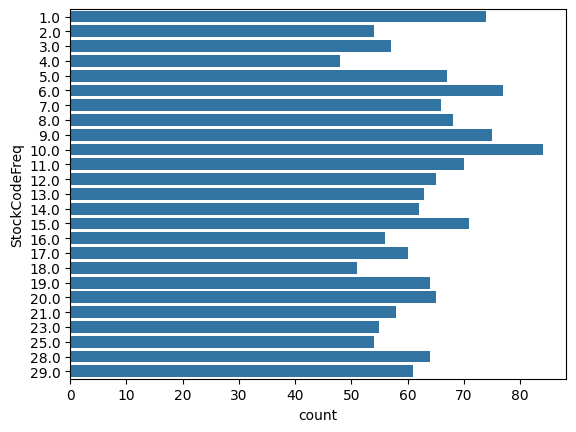

In [63]:
import seaborn as sns

# Get the top 50 StockCodeFreq values
top_25_stock_code_freq = clean_merged_df['StockCodeFreq'].value_counts().nlargest(25).index

# Filter the DataFrame to include only rows with StockCodeFreq in the top 50
top_25_df = clean_merged_df[clean_merged_df['StockCodeFreq'].isin(top_25_stock_code_freq)]

# Bar plot of the top 50 StockCodeFreq values
sns.countplot(y='StockCodeFreq', data=top_25_df)

<Axes: xlabel='count', ylabel='StockCodeFreq'>

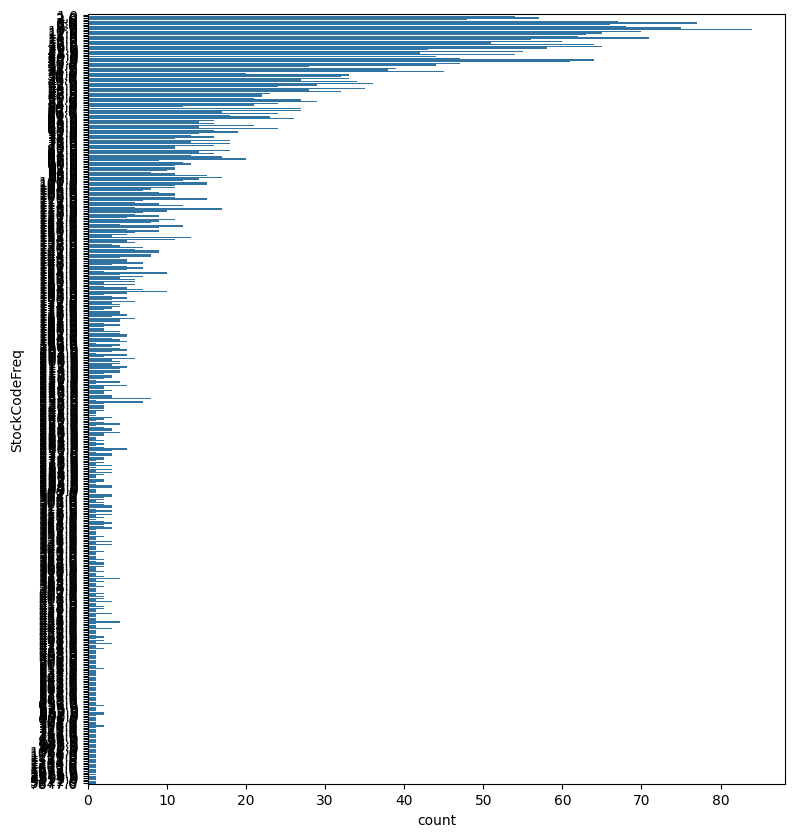

In [64]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='StockCodeFreq', data=clean_merged_df)

In [65]:
invoice_df = retail_df[['CustomerID', 'InvoiceDate']].copy()
invoice_df['date'] = invoice_df['InvoiceDate'].map(lambda x:str(x).split(' ')[0])
customerId = '15311.0'
filteredinvoice_df = invoice_df.loc[invoice_df['CustomerID']==customerId].drop_duplicates(subset=['date'])

filteredinvoice_df#.dtypes

,CustomerID,InvoiceDate,date


In [66]:
#determine the number of days since the customer's last purchase
max_purchase_date_df.columns = ['InvoiceDate', 'InvoiceDateFreq']
#max_purchase_date_df['DaysSinceLastPurchase'] = (pd.to_datetime('today') - max_purchase_date['InvoiceDate']).dt.days
max_purchase_date_df

,InvoiceDate,InvoiceDateFreq
0,2011-11-14 15:27:00,542
1,2011-11-28 15:54:00,533
2,2011-12-05 17:17:00,529
3,2011-11-23 13:39:00,443
4,2011-10-31 14:09:00,435
...,...,...
17232,2011-10-26 13:21:00,1
17233,2011-03-17 17:13:00,1
17234,2011-03-17 18:28:00,1
17235,2011-03-17 18:30:00,1


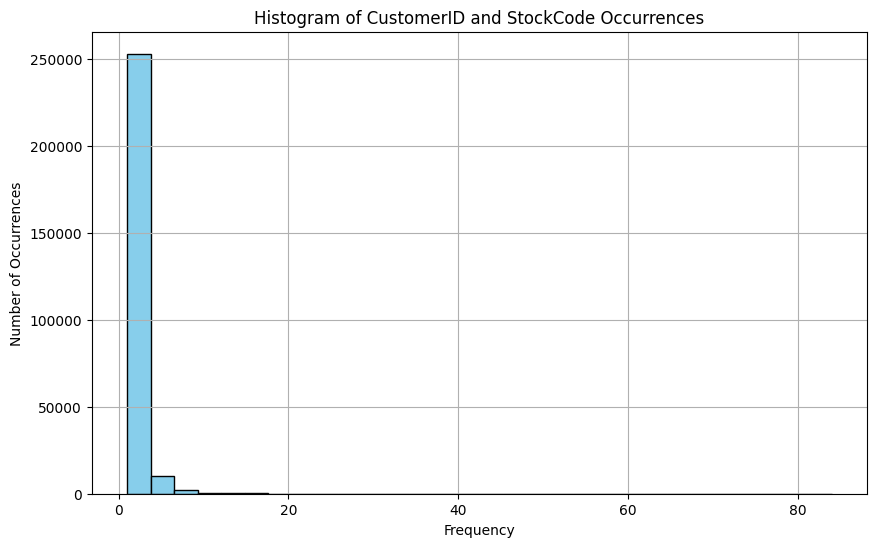

In [67]:
retail_df = pd.DataFrame(retail_df)

# Group the data by CustomerID and StockCode and count occurrences
grouped_df = retail_df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='Frequency')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustomerID and StockCode Occurrences')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()

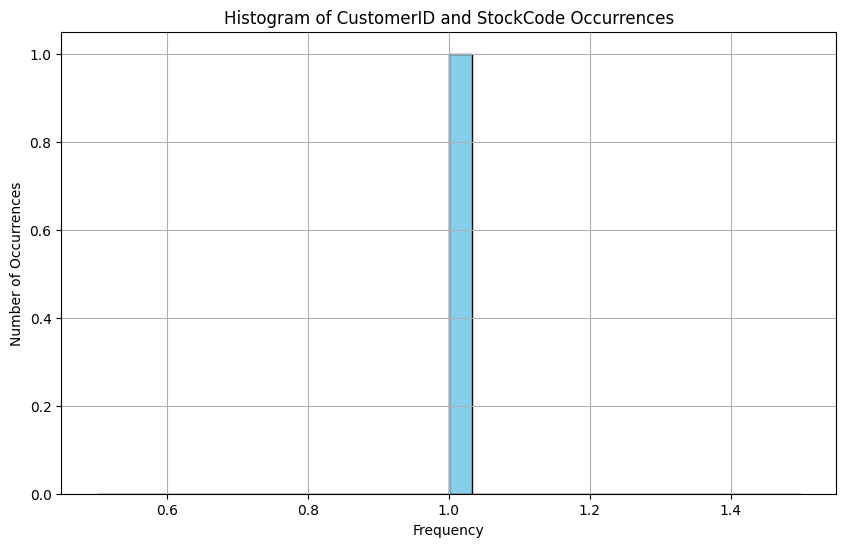

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample data into DataFrame
data = {
    'InvoiceNo': ['InvoiceNo'],
    'StockCode': ['StockCode'],
    'Description': ['Description'],
    'Quantity': ['Quantity'],
    'InvoiceDate': ['InvoiceDate'],
    'UnitPrice': ['UnitPrice'],
    'CustomerID': ['CustomerID'],
    'Country': ['Country']
}

df = pd.DataFrame(data)

# Group the data by CustomerID and StockCode and count occurrences
grouped_df = df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='Frequency')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustomerID and StockCode Occurrences')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()